In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys


if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
df= pd.read_excel('Global.Superstore.xlsx')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2014-07-31,2014-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2015-02-05,2015-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2015-10-17,2015-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2015-01-28,2015-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2015-11-05,2015-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.shape

(51290, 24)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
column_names=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Sales']

In [8]:
df=df[column_names]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping Cost     51290 non-null float64
Or

In [10]:

df.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','State', 'City','Sub-Category','Product Name','Product ID','Postal Code','Ship Mode'],axis=1,inplace=True)
df.head()


,Order Date,Ship Date,Segment,Market,Region,Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,2014-07-31,2014-07-31 00:00:00,Consumer,US,East,Technology,7,0.0,762.1845,933.57,Critical,2309.650
1,2015-02-05,2015-02-07 00:00:00,Corporate,APAC,Oceania,Furniture,9,0.1,-288.7650,923.63,Critical,3709.395
2,2015-10-17,2015-10-18 00:00:00,Consumer,APAC,Oceania,Technology,9,0.1,919.9710,915.49,Medium,5175.171
3,2015-01-28,2015-01-30 00:00:00,Home Office,EU,Central,Technology,5,0.1,-96.5400,910.16,Medium,2892.510
4,2015-11-05,2015-11-06 00:00:00,Consumer,Africa,Africa,Technology,8,0.0,311.5200,903.04,Critical,2832.960


In [11]:
df.columns

Index(['Order Date', 'Ship Date', 'Segment', 'Market', 'Region', 'Category',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales'],
      dtype='object')

In [12]:
Categorical_values = ['Customer Name', 'Segment','Region', 'Market','Order Priority',
       'City', 'State', 'Region','Country/Region', 'Category', 'Sub-Category', 'Product Name']

In [13]:
numerical= [x for x in df.columns if x not in Categorical_values]
numerical

['Order Date',
 'Ship Date',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Sales']

In [14]:
corr_data = df[numerical]

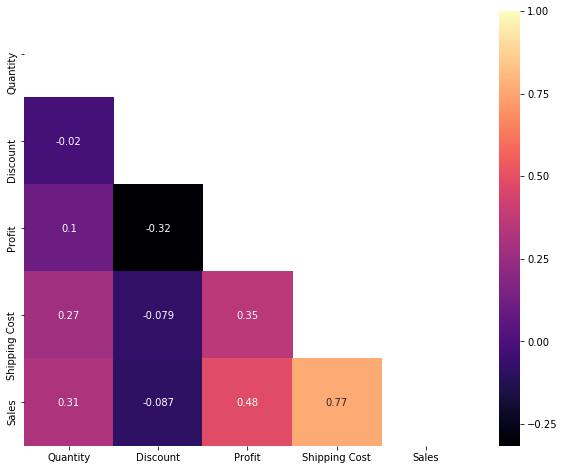

In [15]:
plt.figure(figsize=(10,8))
corr=corr_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#corr = np.triu(corr, k=0)
sns.heatmap(corr, mask=mask,  annot=True, cmap="magma")

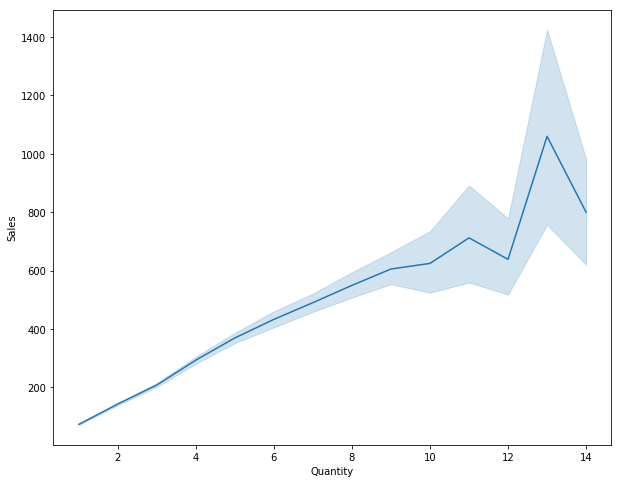

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot('Quantity','Sales', data=df)

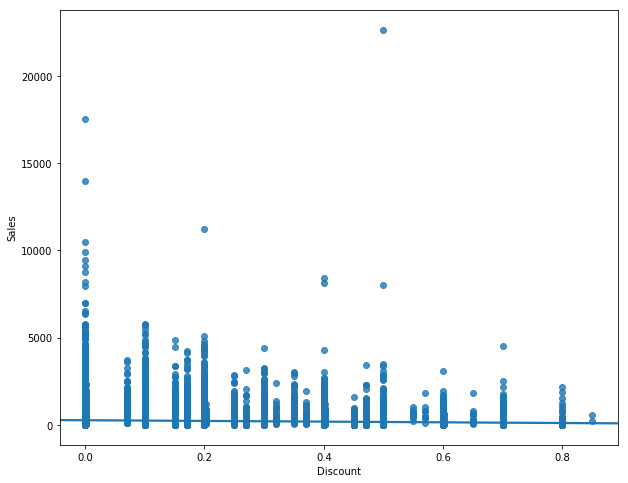

In [17]:
plt.figure(figsize=(10,8))
sns.regplot('Discount','Sales', data=df)

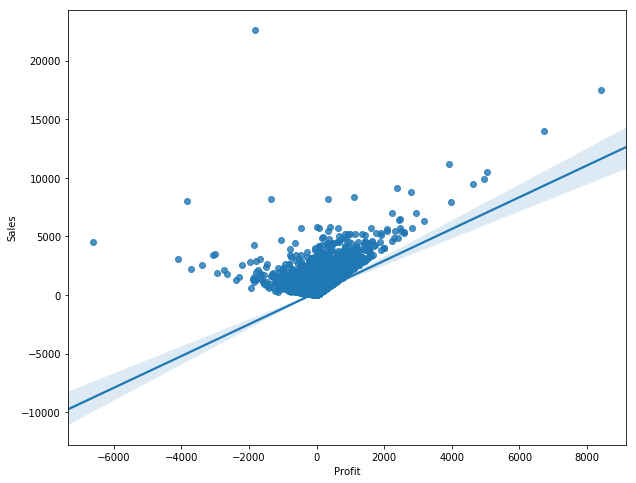

In [18]:
plt.figure(figsize=(10,8))
sns.regplot('Profit','Sales', data=df)

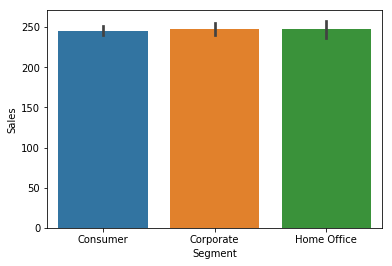

In [19]:
sns.barplot(x='Segment', y='Sales', data=df)


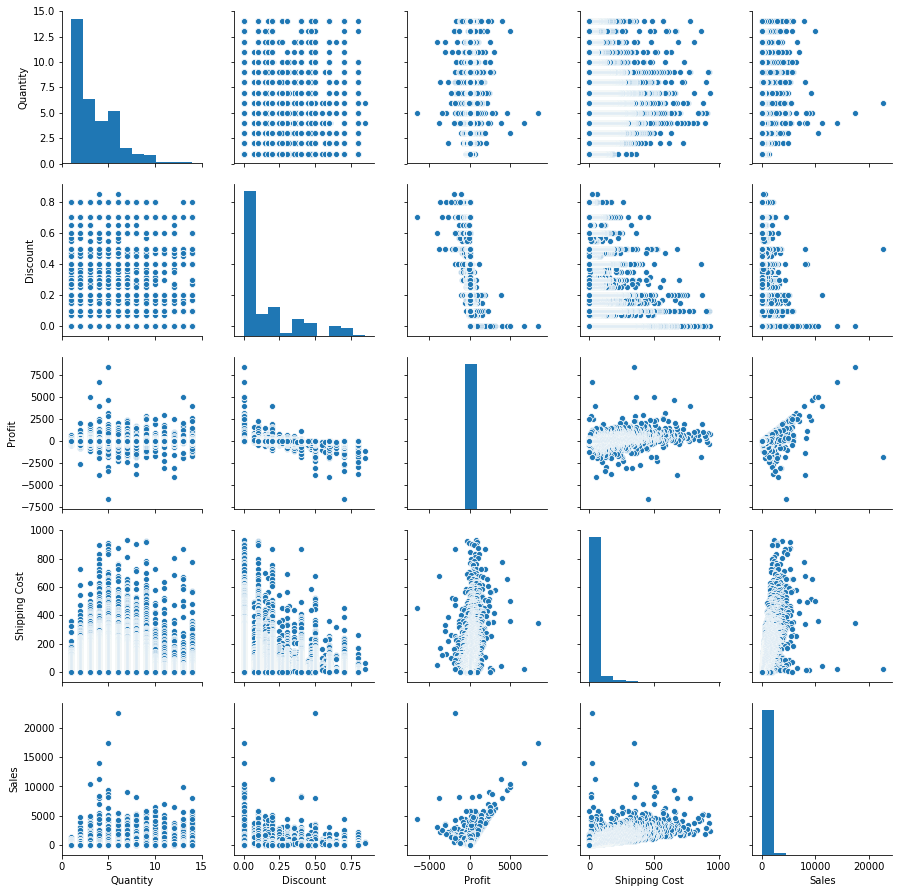

In [20]:
sns.pairplot(df)

In [21]:
df.Region.unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [22]:
df2=pd.get_dummies(df[['Region','Sales']],drop_first=True)

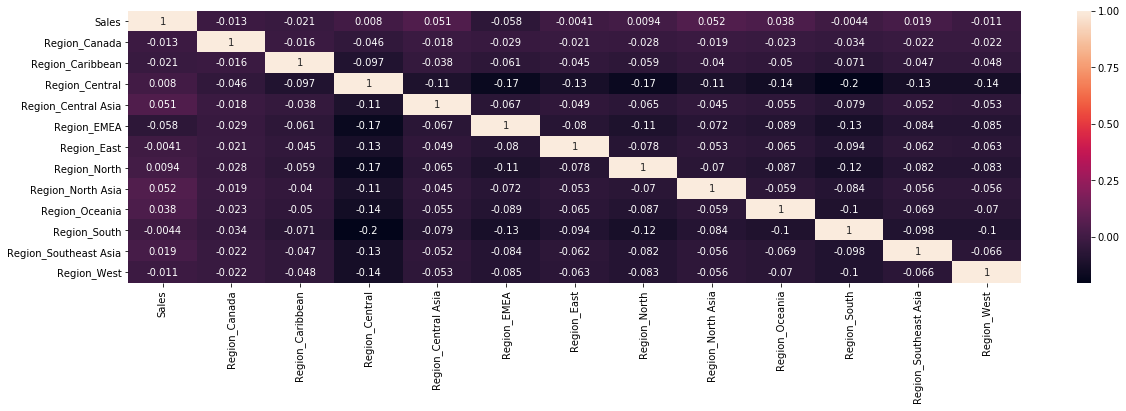

In [23]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

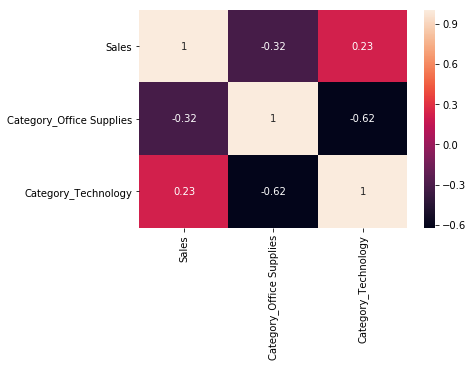

In [24]:
df3=pd.get_dummies(df[['Category','Sales']],drop_first=True)
sns.heatmap(df3.corr(),annot=True)

In [25]:
#df4=pd.get_dummies(df[['Sub-Category','Sales']],drop_first=True)
#plt.figure(figsize=(20,15))
#sns.heatmap(df4.corr(),annot=True)

In [26]:
df.columns

Index(['Order Date', 'Ship Date', 'Segment', 'Market', 'Region', 'Category',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales'],
      dtype='object')

In [27]:
df.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)

In [28]:
df.isnull().sum()

Segment           0
Market            0
Region            0
Category          0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Sales             0
dtype: int64

In [29]:
df.describe()

,Quantity,Discount,Profit,Shipping Cost,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.610982,26.375818,246.490581
std,2.278766,0.212280,174.340972,57.296810,487.565361
min,1.000000,0.000000,-6599.978000,0.002000,0.444000
25%,2.000000,0.000000,0.000000,2.610000,30.758625
50%,3.000000,0.000000,9.240000,7.790000,85.053000
75%,5.000000,0.200000,36.810000,24.450000,251.053200
max,14.000000,0.850000,8399.976000,933.570000,22638.480000


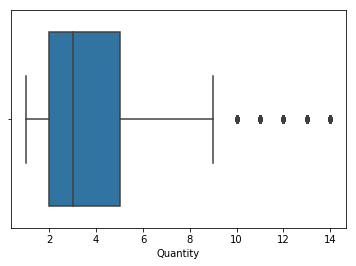

In [30]:
sns.boxplot('Quantity',data=df)

In [31]:
df=pd.get_dummies(df, drop_first=True)
df.tail()

,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Market_Africa,Market_Canada,Market_EMEA,...,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Office Supplies,Category_Technology,Order Priority_High,Order Priority_Low,Order Priority_Medium
51285,5,0.0,4.5000,0.010,65.100,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
51286,1,0.8,-1.1100,0.010,0.444,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
51287,3,0.0,11.2308,0.010,22.920,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
51288,2,0.0,2.4000,0.003,13.440,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
51289,3,0.0,1.8000,0.002,61.380,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [32]:
X=df.drop('Sales', axis=1)

In [33]:
y=df['Sales']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred=reg.predict(X_test)
np.set_printoptions(precision=2)

In [38]:
y_pred

array([285.22,  87.95, 492.1 , ...,   0.62, -24.52, 183.76])

In [39]:
import sklearn.metrics
mse= sklearn.metrics.mean_squared_error(y_test,y_pred)
mse


59336.783873510976

In [40]:
mae= sklearn.metrics.mean_absolute_error(y_test,y_pred)
mae

116.58831805806732

In [41]:
import math
rmse= math.sqrt(mse)

In [42]:
rmse

243.59142816099046

In [43]:
def mean_absolute_perc_error(y_true, y_predict):
    y_true, y_predict = np.array(y_true), np.array(y_predict)
    return np.mean(np.abs((y_true-y_predict)/y_true))*100

In [44]:
mean_absolute_perc_error(y_test,y_pred)

198.59375526660315

In [45]:
from sklearn.metrics import confusion_matrix, r2_score,classification_report

In [46]:
r2_score(y_test,y_pred)

0.7328722502497834

In [47]:
from sklearn.model_selection import cross_val_score
lg_accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(lg_accuracies.std()*100))

Accuracy: 67.31 %
Standard Deviation: 11.97 %


In [48]:
pd.DataFrame(reg.coef_,X.columns,columns=['Coeff'])

,Coeff
Quantity,25.263145
Discount,112.215340
Profit,0.768515
Shipping Cost,5.378191
Segment_Corporate,0.540895
Segment_Home Office,3.173524
Market_Africa,-3.042209
Market_Canada,11.265635
Market_EMEA,0.725611
Market_EU,13.311779


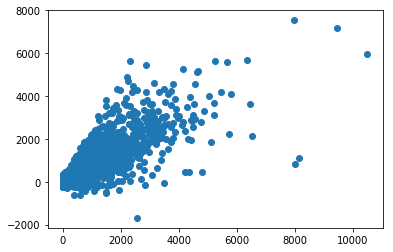

In [49]:
plt.scatter(y_test,y_pred,cmap='viridis')

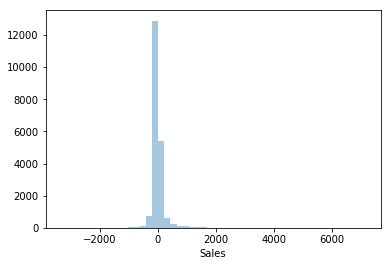

In [50]:
sns.distplot((y_test-y_pred),kde=False)

In [51]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

243.59142816099046

In [52]:
EXEP=df.copy()
EXEP.head(2)

,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Market_Africa,Market_Canada,Market_EMEA,...,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Office Supplies,Category_Technology,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,7,0.0,762.1845,933.57,2309.650,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9,0.1,-288.7650,923.63,3709.395,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(EXEP[['Profit','Quantity','Discount','Sales']]))
print(z)

[[ 4.21  1.55  0.67  4.23]
 [ 1.82  2.42  0.2   7.1 ]
 [ 5.11  2.42  0.2  10.11]
 ...
 [ 0.1   0.21  0.67  0.46]
 [ 0.15  0.65  0.67  0.48]
 [ 0.15  0.21  0.67  0.38]]


In [54]:
threshold = 3
print(np.where(z > 3))

(array([    0,     0,     1, ..., 51258, 51276, 51286], dtype=int64), array([0, 3, 3, ..., 2, 2, 2], dtype=int64))


In [55]:
EXEP_1 = EXEP[(z < 3).all(axis=1)]


In [56]:
EXEP_1.shape

(49096, 30)

In [57]:
EXEP_1=pd.get_dummies(EXEP_1,drop_first=True)
EXEP_1.head(2)




,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Market_Africa,Market_Canada,Market_EMEA,...,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Category_Office Supplies,Category_Technology,Order Priority_High,Order Priority_Low,Order Priority_Medium
30,5,0.2,-148.46,704.056,1696.64,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
63,9,0.0,225.18,600.210,1502.01,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
p=EXEP_1.drop('Sales',axis=1)
q=EXEP_1['Sales']

In [59]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size = 0.3, random_state = 0)

In [60]:
reg.fit(p_train, q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
q_pred = reg.predict(p_test)
q_pred

array([756.35, 114.15, 192.28, ..., 160.93, 629.76, -18.13])

In [62]:
mse = sklearn.metrics.mean_squared_error(q_test,q_pred)
mse

19636.55629771194

In [63]:
rmse= np.sqrt(mse)
rmse

140.13049738622902

In [64]:
mae=sklearn.metrics.mean_absolute_error(q_test,q_pred)
mae

83.4128489676649

In [65]:
r2_score(q_test, q_pred)

0.7312693952339269

In [66]:
lb_accuracies = cross_val_score(estimator = reg, X = p_train, y = q_train, cv = 10)
print("Accuracy: {:.2f} %".format(lb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(lb_accuracies.std()*100))

Accuracy: 71.76 %
Standard Deviation: 1.42 %


In [67]:
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.63
Test set score: 0.72


In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.65
Test set score: 0.73


In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.65
Test set score: 0.73
Number of features used: 11


In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lg_grid = GridSearchCV(reg,parameters, cv=10)
lg_grid.fit(X_train, y_train)
print ("r2 is : ", lg_grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((lg_grid.predict(X_test) - y_test) ** 2))

r2 is :  0.673055741845088
Residual sum of squares: 59336.78


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
from sklearn.model_selection import cross_val_score
rf_accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rf_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(rf_accuracies.std()*100))

Accuracy: 79.78 %
Standard Deviation: 10.38 %


In [73]:
rfr_y_pred = rf.predict(X_test)
rfr_y_pred

array([181.78,  10.4 , 565.42, ...,  22.76,  21.3 , 178.57])

In [74]:
rfr_mse = sklearn.metrics.mean_squared_error(y_test,rfr_y_pred)  ## Mean Squared Error
rfr_mse

28603.040049338288

In [75]:
rfr_rmse= np.sqrt(rfr_mse)  #Root mean squared error
rfr_rmse


169.12433310833273

In [76]:
rfr_mae=sklearn.metrics.mean_absolute_error(y_test,rfr_y_pred)  ## Mean absolute error
rfr_mae

65.49246590562488

In [77]:
rfr_r2=r2_score(y_test, rfr_y_pred)
rfr_r2

0.8712322234942363

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

grid_search = RandomizedSearchCV(estimator = rf,
                           param_distributions = random_grid,
                           n_iter=100,
                           cv = 3,
                                 verbose=2, random_state=42,
                           n_jobs = -1)
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [82]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



Model Performance
Average Error: 65.4925 degrees.
Accuracy = 69.77%.


In [80]:
best_random = grid_search.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 64.6182 degrees.
Accuracy = 70.18%.


In [81]:
rfr_best_score =grid_search.best_score_
rfr_best_parameters = grid_search.best_params_
print("Best Score: {:.2f} %".format(rfr_best_score*100))
print("Best Parameters:", rfr_best_parameters)

Best Score: 78.89 %
Best Parameters: {'n_estimators': 235, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [84]:
rfe= RandomForestRegressor(n_estimators=235,min_samples_split=10,min_samples_leaf=2, max_features='auto',max_depth=None, bootstrap=True, random_state=42)
rfe.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=235, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [88]:
rfe_accuracies = cross_val_score(estimator = rfe, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rfe_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(rfe_accuracies.std()*100))

Accuracy: 80.13 %
Standard Deviation: 10.50 %


In [112]:
rfr_y_pred = rfe.predict(X_test)
print(sum(rfr_y_pred))
print(sum(y_test))

5094761.981860158
5081119.965559967


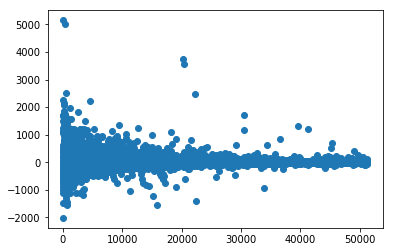

In [90]:
plt.plot(y_test - rfr_y_pred,marker='o',linestyle='')

Text(0, 0.5, 'Prediction')

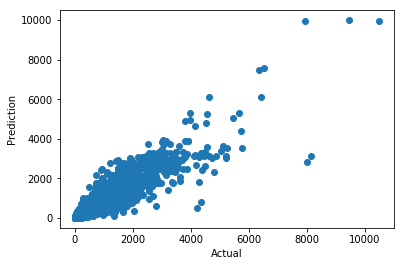

In [106]:
plt.scatter(y_test, rfr_y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")

In [104]:
pd.DataFrame(data={'predictions': rfr_y_pred, 'actual': y_test}).head()

,predictions,actual
11269,202.911331,201.120
49073,9.644510,7.524
13078,604.365897,775.620
42296,12.200573,7.620
30163,62.619507,59.160


In [107]:
rfr_mse = sklearn.metrics.mean_squared_error(y_test,rfr_y_pred)  ## Mean Squared Error
rfr_mse

27863.086350751437

In [108]:
rfr_r2=r2_score(y_test, rfr_y_pred)
rfr_r2

0.8745634145955979